# Trainning, evaluating and visualizing models

**Import** data from "data/featured.csv"

**Export** model

In [3]:
# Setup

import numpy as np
import pandas as pd

from pkg import utils
from pkg import clean
from pkg import plot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor

from xgboost import plot_importance
import matplotlib.pyplot as plt


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
# Importing data

parent = 'data'
filename = 'featured.csv'

path = utils.get_path(parent, filename)

df = pd.read_csv(path, index_col=0)

In [5]:
# Configurations

run_save = True

seed = 123

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

print(y)

ID_LOJA
922686   -0.342069
938287   -0.370563
939120    0.353482
933554    0.041225
948294    0.495168
            ...   
964222   -0.252296
933678   -0.077042
912703   -0.214435
917068    0.187596
937105   -0.356121
Name: RENDA, Length: 47422, dtype: float64


In [8]:
# Trainning and evaluate model

model = XGBRegressor(n_estimators=1000, max_depth=5,min_child_weight=4,
                     gamma=0.0,subsample=1.0,colsample_bytree=0.7,
                    reg_lambda=9,reg_alpha=0,random_state=seed)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

print('Mean R2: %.3f (%.3f)' % (scores.mean(), scores.std()))


Mean R2: 0.592 (0.021)


In [10]:
model.fit(X_train,y_train)
y_hat = model.predict(X_test)

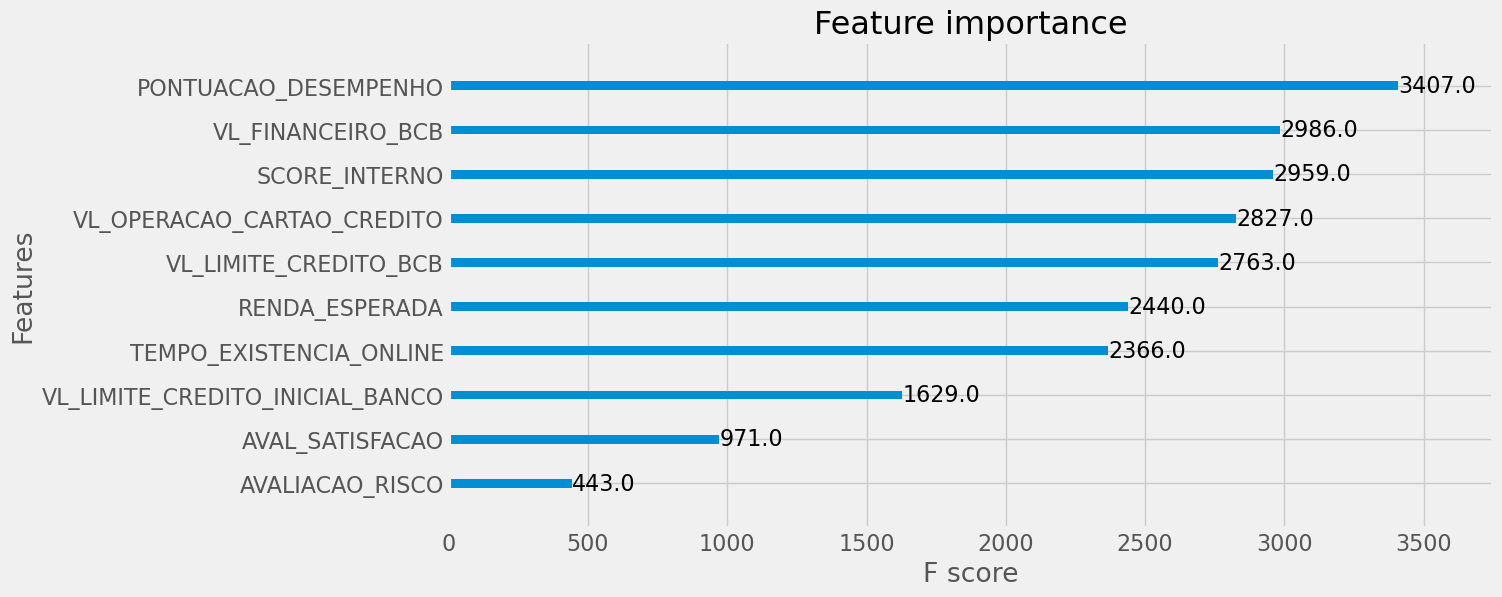

In [11]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model, max_num_features=10, ax=ax)
plt.show()

In [17]:
import shap
sample = X_test.sample(500)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(sample)
#shap.summary_plot(shap_values, sample)

#fig = plt.figure(figsize=(10,10))

print(shap_values)

[20:23:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


[[ 3.5874750e-02 -3.8209546e-02  4.7467387e-01 ...  3.7447903e-02
   5.8358358e-03  2.2654543e-03]
 [-1.0602706e-01 -7.0424564e-02  5.4577315e-01 ...  5.1221434e-02
  -5.3204121e-03  2.1115337e-03]
 [ 6.8066597e-02 -2.1130793e-02  1.7967348e-01 ...  4.6499480e-02
   4.8311905e-04  8.4302770e-03]
 ...
 [-3.3735398e-02  2.2056609e-01 -5.1535342e-02 ...  9.7304121e-02
  -5.7656281e-03  1.3896425e-03]
 [ 8.3581306e-02 -4.3836884e-02 -6.1544381e-02 ...  1.0081488e-01
   6.1794233e-02 -4.8008612e-03]
 [ 2.5366509e-02 -9.9599898e-02 -4.8854981e-02 ...  9.4363876e-02
  -7.2135101e-03  3.1938697e-03]]


[19:58:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


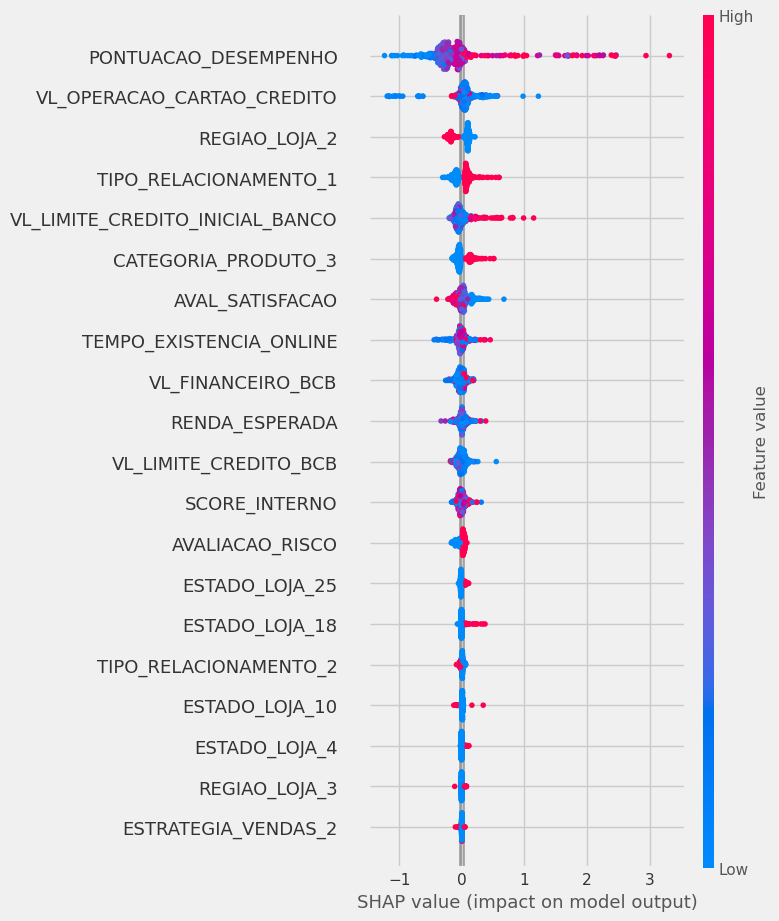

figure saved on  c:\Users\ptons\Code\repositories\datathon\reports\xgboost_shap


In [14]:


plot.shapping_rf(model, sample, savename="xgboost_shap")

In [ ]:
label_encoder = {'TIPO_RELACIONAMENTO': {0: 'Tipo 1', 1: 'Tipo 2', 2: 'Tipo 3', 3: 'Tipo 4', 4: 'Tipo 5'}, 
                 'ESTADO_LOJA': {0: 'AC', 1: 'AL', 2: 'AM', 3: 'AP', 4: 'BA', 5: 'CE', 6: 'DF', 7: 'ES', 8: 'GO', 9: 'MA', 10: 'MG', 11: 'MS', 12: 'MT', 13: 'PA', 14: 'PB', 15: 'PE', 16: 'PI', 17: 'PR', 18: 'RJ', 19: 'RN', 20: 'RO', 21: 'RR', 22: 'RS', 23: 'SC', 24: 'SE', 25: 'SP', 26: 'TO'}, 
                 'CATEGORIA_PRODUTO': {0: 'Alimentos e Bebidas', 1: 'Eletronicos', 2: 'Moda e Vestuário', 3: 'Outros', 4: 'Produtos para Casa', 5: 'Saude e Beleza'}, 
                 'ESTRATEGIA_VENDAS': {0: 'Nao informado', 1: 'Padrao', 2: 'Personalizada'}, 
                 'REGIAO_LOJA': {0: 'CO', 1: 'N', 2: 'NE', 3: 'S', 4: 'SE'}}

In [15]:
# Exporting model

model = model# Add final df
filename = "xgboost.pkl"

if run_save:
  utils.save_model(model, filename)

model saved on:  c:\Users\ptons\Code\repositories\datathon\models\xgboost.pkl
